In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf


Data collection

In [4]:
time=pd.read_csv("../Simple linear regression/delivery_time.csv")
print(time.head())

   DeliveryTime  SortingTime
0         21.00           10
1         13.50            4
2         19.75            6
3         24.00            9
4         29.00           10


Exploratory data analysis

In [5]:
time.shape

(21, 2)

In [6]:
time.describe()

,DeliveryTime,SortingTime
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [7]:
print(time.isnull().sum())

DeliveryTime    0
SortingTime     0
dtype: int64


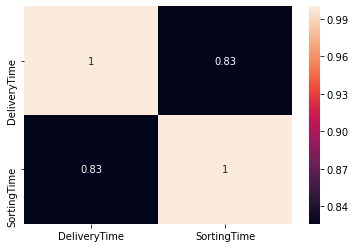

In [8]:
import seaborn as sns
sns.heatmap(time.corr(),annot=True)
plt.show()

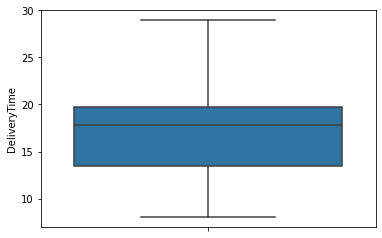

In [9]:
ax = sns.boxplot(y="DeliveryTime", data=time)

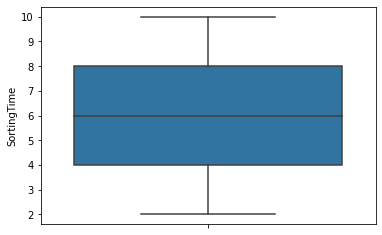

In [10]:
ax = sns.boxplot(y="SortingTime", data=time)

In [11]:
#correlation value between feature and outcome
time.corr()

,DeliveryTime,SortingTime
DeliveryTime,1.000000,0.825997
SortingTime,0.825997,1.000000


Linear Regression Model

In [3]:
slr_model=smf.ols("DeliveryTime~SortingTime",data=time).fit()
print("Training Done")
print(slr_model.summary())

Training Done
                            OLS Regression Results                            
Dep. Variable:           DeliveryTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 19 Mar 2021   Prob (F-statistic):           3.98e-06
Time:                        23:40:52   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722   

In [4]:
pred=slr_model.predict(time.iloc[:,1])
print(pred)

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64


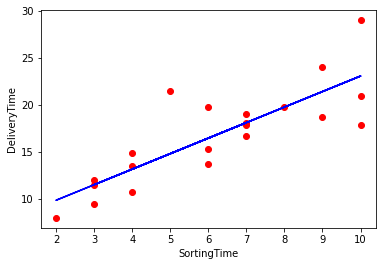

In [5]:
#visulization
plt.scatter(x=time['SortingTime'],y=time['DeliveryTime'],color='red');plt.plot(time['SortingTime'],pred,color='blue')
plt.xlabel('SortingTime');plt.ylabel('DeliveryTime')
plt.show()

In [7]:
pred.corr(time.DeliveryTime)

0.8259972607955325